# Análise Exploratória

Nessa etapa do projeto vamos fazer algumas análises descritivas e verificar alguns insights

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Carregando o conjunto de dados

In [3]:
# Carregando o conjunto de dados e salvando na variável 'imoveis'.
imoveis = pd.read_csv('imoveis_clean_base.csv')

# Vamos tirar a coluna 'Unnamed: 0' pois a mesma não apresenta informação nenhuma
imoveis = imoveis.drop(['Unnamed: 0'], axis=1)

In [4]:
pd.set_option('display.max_columns', 100)

# Verificando o dataset
imoveis.head()

,Link,Estado,Cidade,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Descrição,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
0,-apartamento-3-quartos-com-elevador-funcionari...,mg,belo horizonte,3250.0,700.0,0.0,75.0,3.0,2.0,2.0,"Codigo do Imóvel: 4058 - NOVO, ÓTIMA LOCALIAZA...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-apartamento-2-quartos-com-piscina-santo-agost...,mg,belo horizonte,3100.0,856.0,290.0,60.0,2.0,2.0,2.0,Prédio moderno; apartamento nunca habitado; 2 ...,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-apartamento-3-quartos-cidade-nova-belo-horizo...,mg,belo horizonte,1500.0,280.0,160.0,110.0,3.0,2.0,3.0,Alugo apartamento amplo com duas salas separad...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,-apartamento-2-quartos-com-piscina-ouro-preto-...,mg,belo horizonte,1300.0,399.0,100.0,60.0,2.0,1.0,2.0,"Apartamento com linda vista, ventilado, cozinh...",1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0
4,-apartamento-3-quartos-ipiranga-belo-horizonte...,mg,belo horizonte,1100.0,360.0,110.0,95.0,3.0,2.0,1.0,"Apartamento com 3 quartos, sendo dois com armá...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Verificando algumas características da base de dados

In [5]:
# Verificando a quantidade da base de dados
imoveis.shape

(15958, 37)

In [6]:
# Verificando se existe dados missing's ou "faltantes"
imoveis.isnull().sum()

Link                       0
Estado                     0
Cidade                     0
Valor_aluguel              0
Valor_condomínio           0
Valor_iptu                 0
Área_total                 0
Qt_quartos                 0
Qt_vagas                   0
Qt_banheiros               0
Descrição                  0
Academia                   0
Acesso_para_deficientes    0
Ar_condicionado            0
Área_de_serviço            0
Armário_embutido           0
Armário_na_cozinha         0
Bicicletário               0
Churrasqueira              0
Circuito_de_segurança      0
Conexão_à_internet         0
Elevador                   0
Espaço_gourmet             0
Garagem                    0
Interfone                  0
Lavanderia                 0
Mobiliado                  0
Piscina                    0
Playground                 0
Quadra_de_tênis            0
Quadra_poliesportiva       0
Salão_de_festas            0
Sauna                      0
Segurança_24h              0
Sistema_de_ala

In [7]:
# Verificando o tipo de cada coluna
imoveis.dtypes

Link                        object
Estado                      object
Cidade                      object
Valor_aluguel              float64
Valor_condomínio           float64
Valor_iptu                 float64
Área_total                 float64
Qt_quartos                 float64
Qt_vagas                   float64
Qt_banheiros               float64
Descrição                   object
Academia                     int64
Acesso_para_deficientes      int64
Ar_condicionado              int64
Área_de_serviço              int64
Armário_embutido             int64
Armário_na_cozinha           int64
Bicicletário                 int64
Churrasqueira                int64
Circuito_de_segurança        int64
Conexão_à_internet           int64
Elevador                     int64
Espaço_gourmet               int64
Garagem                      int64
Interfone                    int64
Lavanderia                   int64
Mobiliado                    int64
Piscina                      int64
Playground          

    - Tirando a variável da região, podemos ver que nossos dados são todos do tipo numerico, tirando a necessidade de fazer transformações de dados        categóricos.
    *Exceto "Descrição" mas essa coluna não entra no modelo

### Tirando estatísticas descritivas

Podemos tirar estatísticas descritivas com o método describe() do pandas

In [12]:
pd.set_option('float_format', '{:f}'.format)
imoveis.drop(['Descrição'], axis=1).describe()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
count,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000,15958.000000
mean,1737.430129,378.094498,68.429001,68.813886,2.113485,1.095125,1.637862,0.180599,0.004700,0.195701,0.414024,0.112357,0.161988,0.002068,0.341083,0.089046,0.038163,0.511718,0.104587,0.105151,0.371475,0.058842,0.183168,0.371412,0.279797,0.011844,0.162740,0.391653,0.105527,0.069871,0.058090,0.019802,0.213749
std,827.696758,299.792859,83.280176,23.704468,0.747391,0.870351,0.743555,0.384698,0.068396,0.396752,0.492568,0.315816,0.368451,0.045429,0.474088,0.284819,0.191595,0.499878,0.306030,0.306758,0.483214,0.235336,0.386817,0.483198,0.448913,0.108185,0.369140,0.488135,0.307241,0.254937,0.233921,0.139324,0.409964
min,355.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,80.000000,0.000000,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1600.000000,370.000000,44.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2300.000000,572.000000,111.000000,82.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4400.000000,1374.000000,367.000000,136.000000,5.000000,30.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Análise: </b>

    - Existem imóveis que não tem valor de condomínio e valor de iptu.
    - Podemos ver que na base tem imóveis com quantidade de vagas até 30, é uma quantia muito grande, vamos verificar.
    - O desvio padrão das variáveis 'Valor_aluguel' está um valor muito distante da média, isso indica que os dados estão espalhados por uma ampla gama de valores.
    
"Depois que tiramos os outliers das principais variáveis, nossos dados ficaram mais condicionados e realistas ao tipo de problema de negócio."

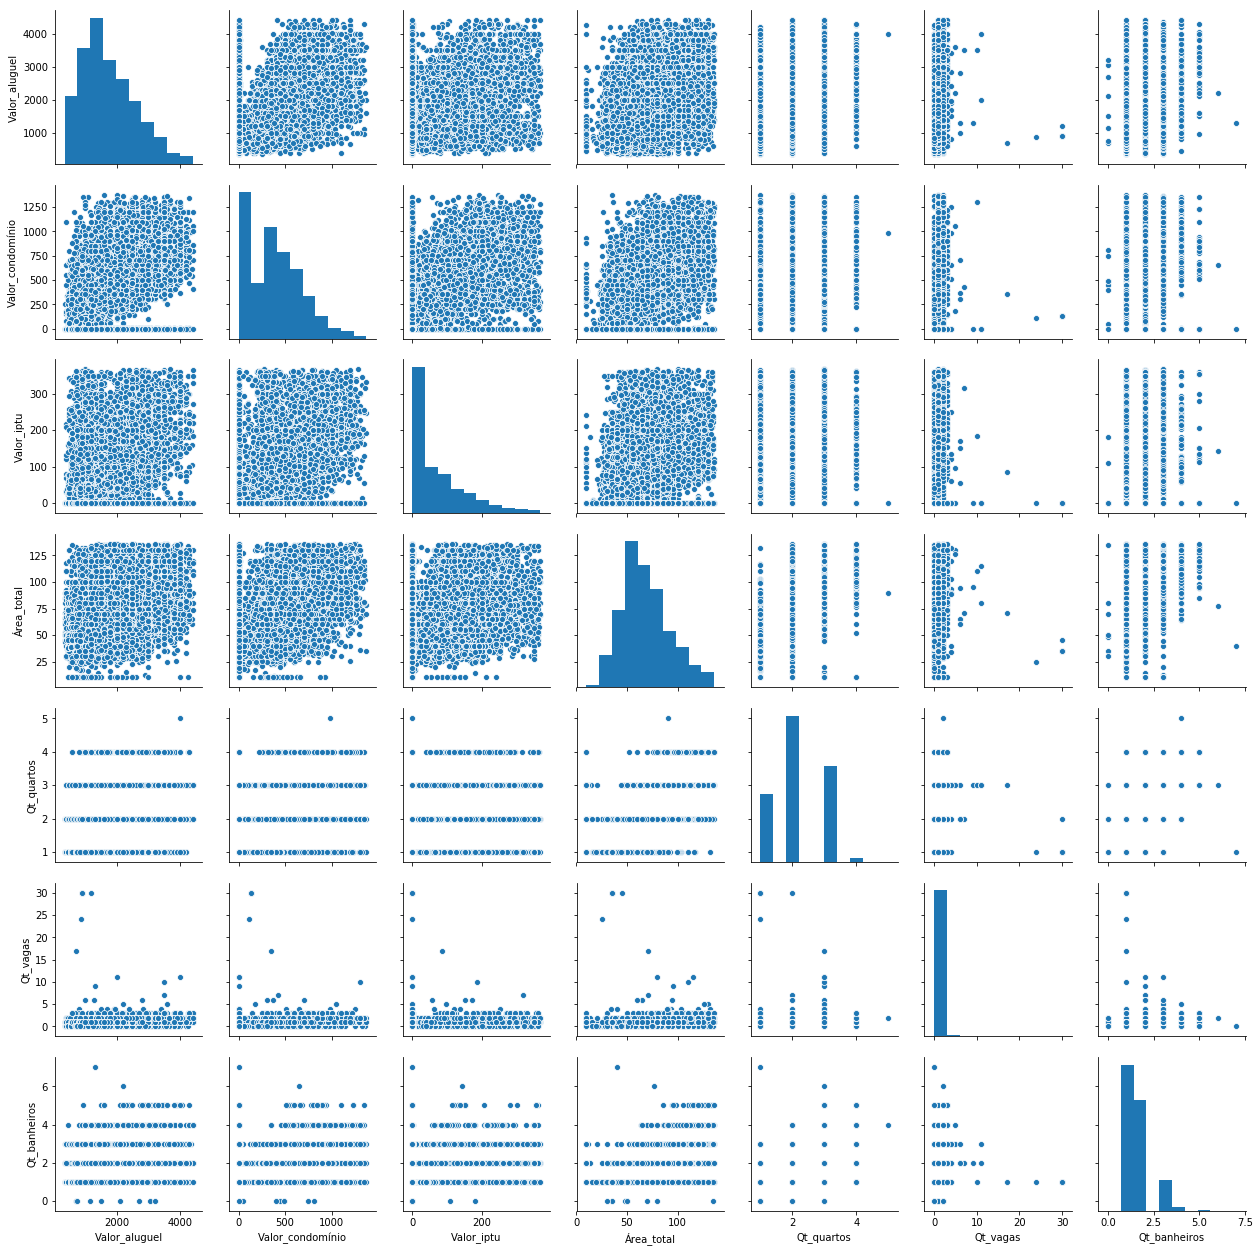

In [13]:
# Visualização de relacionamentos com o pairplot do pacote seaborn
sns.pairplot(imoveis[['Valor_aluguel', 'Valor_condomínio', 'Valor_iptu', 'Área_total', 'Qt_quartos', 'Qt_vagas', 'Qt_banheiros']])

 Podemos ver no gráfico acima que a relação entre as variáveis são bem fraca

----------------------------------------------------------------------

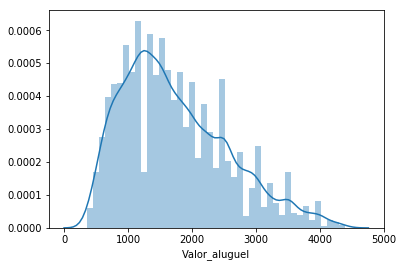

In [145]:
# Histograma com estimativa de densidade de kernel - Distribuição univariada
sns.distplot(imoveis.Valor_aluguel);

Podemos ver que os valores da nossa variável Valor_aluguel está com uma distribuição assimétrica positiva

----------------------------------------------------------------------

### Quais são as principais características que mais influenciam o preço do aluguel dos apartamentos?

Vamos usar o método de correlação pearson, com ele podemos ver o grau de correlação/influencia que uma variável pode ter com a outra, esse grau de correlação pode ir de -1 a 1. Nesse nosso caso queremos uma correlação quanto maior melhor.

In [14]:
imoveis.corr()

,Valor_aluguel,Valor_condomínio,Valor_iptu,Área_total,Qt_quartos,Qt_vagas,Qt_banheiros,Academia,Acesso_para_deficientes,Ar_condicionado,Área_de_serviço,Armário_embutido,Armário_na_cozinha,Bicicletário,Churrasqueira,Circuito_de_segurança,Conexão_à_internet,Elevador,Espaço_gourmet,Garagem,Interfone,Lavanderia,Mobiliado,Piscina,Playground,Quadra_de_tênis,Quadra_poliesportiva,Salão_de_festas,Sauna,Segurança_24h,Sistema_de_alarme,Spa,Varanda
Valor_aluguel,1.000000,0.274879,0.282316,0.331439,0.157167,0.242258,0.349838,0.282986,0.030378,0.233453,0.008586,0.103846,0.088253,0.037374,0.193219,0.088467,0.055980,0.282403,0.164790,-0.089754,0.055787,0.066552,0.181680,0.303307,0.159843,0.054867,0.127614,0.251611,0.259037,-0.016755,0.085238,0.123642,0.099478
Valor_condomínio,0.274879,1.000000,0.530188,0.318922,0.178305,0.148532,0.252952,0.040125,0.011528,-0.050604,0.064333,0.140028,0.147356,0.019211,0.009394,-0.009529,-0.078433,0.120184,-0.043406,-0.007030,0.076123,-0.013875,-0.082956,0.005230,0.122786,0.011209,0.073510,0.129916,0.102540,0.038198,-0.040731,-0.014642,0.060152
Valor_iptu,0.282316,0.530188,1.000000,0.197188,0.076694,0.103526,0.149587,0.038078,0.008888,-0.027156,0.097956,0.166261,0.131226,0.007451,-0.019446,0.003079,-0.037219,0.024567,-0.024016,0.039154,0.115390,-0.017720,-0.060213,-0.038808,0.040481,0.013236,0.015721,0.051882,0.098423,0.053304,-0.034796,-0.004572,0.028413
Área_total,0.331439,0.318922,0.197188,1.000000,0.720408,0.272677,0.591473,-0.020415,-0.010709,-0.058590,0.118282,0.000023,-0.012908,-0.002145,0.033916,0.000552,-0.007309,0.070445,-0.010465,0.000649,0.063013,-0.105320,-0.128969,-0.024664,0.077802,0.057138,0.084964,0.036781,-0.051333,0.003137,0.024079,-0.041124,0.119261
Qt_quartos,0.157167,0.178305,0.076694,0.720408,1.000000,0.259610,0.519055,-0.049710,-0.010434,-0.139995,0.131792,-0.015261,-0.012598,-0.006912,0.079465,0.000511,-0.027183,-0.007837,-0.007509,0.023390,0.079866,-0.115641,-0.212589,-0.002191,0.119408,0.032205,0.145893,0.053889,-0.103463,0.009691,0.020360,-0.076951,0.087927
Qt_vagas,0.242258,0.148532,0.103526,0.272677,0.259610,1.000000,0.271989,0.116017,0.001964,0.027390,0.034573,0.024724,0.009400,0.028309,0.124880,0.041164,0.021071,0.100572,0.076052,0.045157,0.069901,0.007550,-0.011736,0.140252,0.114084,0.060580,0.100447,0.141677,0.062528,0.032180,0.051041,0.024776,0.098448
Qt_banheiros,0.349838,0.252952,0.149587,0.591473,0.519055,0.271989,1.000000,0.097643,0.012520,0.021659,0.105171,0.012093,-0.002945,0.009185,0.116821,0.063207,0.032791,0.145881,0.084937,-0.031413,0.090830,-0.032573,-0.051306,0.106119,0.139862,0.093053,0.130936,0.126624,0.036441,0.033650,0.081321,0.008733,0.136971
Academia,0.282986,0.040125,0.038078,-0.020415,-0.049710,0.116017,0.097643,1.000000,0.046337,0.186404,-0.049019,-0.053033,-0.120192,0.021660,0.266644,0.206114,0.130951,0.207663,0.425092,0.014314,0.021039,0.135963,0.157130,0.392624,0.391778,0.178987,0.268748,0.429924,0.329724,0.079639,0.062387,0.232598,0.117609
Acesso_para_deficientes,0.030378,0.011528,0.008888,-0.010709,-0.010434,0.001964,0.012520,0.046337,1.000000,0.044623,-0.055901,0.077095,0.064285,0.259069,0.006607,-0.018267,-0.013688,-0.026356,0.066335,-0.023556,-0.049036,0.002285,0.036152,0.030613,0.022483,0.009416,0.001972,0.038716,0.033059,-0.018834,-0.017065,0.016539,0.028985
Ar_condicionado,0.233453,-0.050604,-0.027156,-0.058590,-0.139995,0.027390,0.021659,0.186404,0.044623,1.000000,0.007376,0.048068,0.018053,0.040130,0.171850,0.127501,0.168031,0.182924,0.175164,-0.051176,0.038861,0.157887,0.410370,0.224601,0.067977,0.035059,0.042261,0.130686,0.180162,0.033329,0.128691,0.099947,0.129635


<b> Análise: </b>

    - Usando o método de correlação pearson, apesar das correlações estarem baixa, as variáveis que mais se correlacionam e influenciam o preço do aluguel dos apartamentos são, valor do condomínio, valor do iptu, área total, quantidade de banheiros, academia, elevador, piscina, salão de festas e sauna.

"Legal vermos que as características que mais correlacionam com nossa target são as características que as pessoas mais buscam hoje em dia em um imóvel para locar."

----------------------------------------------------------------------

### Quais são as regiões com as maiores médias de alugueis de imóveis? 

Cidade
sao-luis     2032.518072
recife       2097.739005
belem        2219.564103
manaus       2380.179775
sao-paulo    2408.683533
Name: Valor_aluguel, dtype: float64

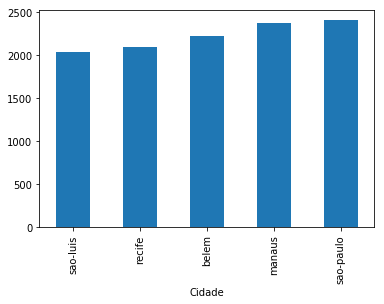

In [42]:
imoveis.groupby(["Cidade"])["Valor_aluguel"].mean().sort_values().tail().plot(kind="bar")
imoveis.groupby(["Cidade"])["Valor_aluguel"].mean().sort_values().tail()

<b> Análise: </b>
    - As capitais em que o preço médio do aluguel é mais caro, são: São Luís, Recife, Belém, Manaus e São Paulo

----------------------------------------------------------------------

### Qual é a proporção do preço dos aluguéis em relação ao valor do salário-mínimo?

In [91]:
# Tirando o preço médio dos alugueis em geral para o Brasil
valor_medio_aluguel_brasil = imoveis['Valor_aluguel'].mean()
valor_medio_aluguel_brasil

1737.4301290888582

In [92]:
# Salário minimo
salario_minimo = 1100

In [95]:
# Calculando o a proporção do aluguel em relação ao salário minimo
round((valor_medio_aluguel_brasil / salario_minimo)*100,2)

157.95

<b> Análise: </b>
    - O aluguel médio dos imóveis no nosso atual dataset é de 157.95% o valor do salário minimo.

----------------------------------------------------------------------

### Em relação a toda base de dados qual é a quantidade proporcional dos imóveis em que o preço do aluguel é maior que o preço médio em todo o território brasileiro? Quais são as 3 capitais e qual é o valor total proporcional delas?

In [31]:
# Tirando o preço médio dos alugueis em geral para o Brasil
valor_medio_aluguel_brasil = imoveis['Valor_aluguel'].mean()
valor_medio_aluguel_brasil

1737.4301290888582

In [25]:
# Criando uma lista com o nome das capitais
cidades = imoveis['Cidade'].unique()

In [27]:
# Fazendo um dicionário com os nomes das capitais
media_aluguel_cidades = {'belo horizonte':'', 'porto-velho':'', 'manaus':'', 'campo-grande':'',
       'brasilia':'', 'cuiaba':'', 'palmas':'', 'sao-paulo':'', 'teresina':'',
       'rio-de-janeiro':'', 'belem':'', 'goiania':'', 'salvador':'', 'florianopolis':'',
       'sao-luis':'', 'maceio':'', 'porto-alegre':'', 'curitiba':'', 'fortaleza':'',
       'recife':'', 'joao-pessoa':'', 'aracaju':'', 'natal':'', 'vitoria':''}

In [29]:
# Função para calcular a quantidade proporcional de imóveis filtrando por valor do aluguel e região
for i in cidades:
    x = round((len(imoveis[(imoveis["Valor_aluguel"] > valor_medio_aluguel_brasil) &\
                           (imoveis["Cidade"] == i)]) / imoveis.shape[0])*100, 2)
    media_aluguel_cidades[i] = x

In [76]:
# Mostrando o resultado em ordem crescente
for item in sorted(media_aluguel_cidades, key = media_aluguel_cidades.get):
    print("Cidade:",item, "Valor:", media_aluguel_cidades[item])

Cidade: palmas Valor: 0.02
Cidade: aracaju Valor: 0.04
Cidade: teresina Valor: 0.05
Cidade: campo-grande Valor: 0.06
Cidade: porto-velho Valor: 0.16
Cidade: vitoria Valor: 0.36
Cidade: maceio Valor: 0.44
Cidade: sao-luis Valor: 0.63
Cidade: manaus Valor: 0.84
Cidade: fortaleza Valor: 0.93
Cidade: goiania Valor: 0.98
Cidade: brasilia Valor: 1.01
Cidade: joao-pessoa Valor: 1.19
Cidade: natal Valor: 1.27
Cidade: belem Valor: 1.3
Cidade: cuiaba Valor: 1.4
Cidade: curitiba Valor: 2.07
Cidade: porto-alegre Valor: 3.21
Cidade: rio-de-janeiro Valor: 3.7
Cidade: florianopolis Valor: 4.15
Cidade: belo horizonte Valor: 4.2
Cidade: salvador Valor: 4.2
Cidade: recife Valor: 5.53
Cidade: sao-paulo Valor: 5.55


In [85]:
# Calculando o valor proporcional de todos os imóveis
round(sum(sorted(media_aluguel_cidades.values())),2)

43.29

In [83]:
# Calculando o valor proporcional das três maiores capitais
round(sum(sorted(media_aluguel_cidades.values())[21:24]),2)

15.28

<b> Análise: </b>
    - Podemos ver pela primeira função que o valor total proporcional é de aproximadamente 43%, isso significa que um pouco mais de 43% dos imóveis tem o valor do aluguel acima da média.
    - Também temos as 3 capitais onde o valor proporcional delas é maior que todas, são elas: Salvador com 4.2%, Recife com 5.53% e São Paulo com 5.55%, analisando dessa forma,15.28% da nossa base de dados tem o valor do aluguel nessas capitais acima da média.
    - Em algumas capitais, além das 3 maiores, tem cidades onde a proporção foi bem alta também, por exemplo, o Rio de Janeiro, Florianópolis e Belo Horizonte.

----------------------------------------------------------------------

### Quais são as 5 características que mais frequentemente aparecem nos imóveis?

In [146]:
# Dicionário de características
carac = {'Academia':'', 'Acesso_para_deficientes':'', 'Ar_condicionado':'',
       'Área_de_serviço':'', 'Armário_embutido':'', 'Armário_na_cozinha':'',
       'Bicicletário':'', 'Churrasqueira':'', 'Circuito_de_segurança':'',
       'Conexão_à_internet':'', 'Elevador':'', 'Espaço_gourmet':'', 'Garagem':'',
       'Interfone':'', 'Lavanderia':'', 'Mobiliado':'', 'Piscina':'', 'Playground':'',
       'Quadra_de_tênis':'', 'Quadra_poliesportiva':'', 'Salão_de_festas':'', 'Sauna':'',
       'Segurança_24h':'', 'Sistema_de_alarme':'', 'Spa':'', 'Varanda':''}

In [147]:
# Função para calcular a quantidade de frequência das características
for k,v in carac.items():
    x = len(imoveis[imoveis[k] == 1])
    carac[k] = x

In [156]:
# Mostrando o resultado em um dataframe
caracteristica = []
valor = []

for item in sorted(carac, key = carac.get, reverse=True):
#    print("Característica:",item, "-",carac[item])
    caracteristica.append(item)
    valor.append(int(carac[item]))
    
df_caracteristicas = pd.DataFrame()
df_caracteristicas['Tipo_Característica'] = caracteristica
df_caracteristicas['Quantidade'] = valor
df_caracteristicas.head()

,Tipo_Característica,Quantidade
0,Elevador,8166
1,Área_de_serviço,6607
2,Salão_de_festas,6250
3,Interfone,5928
4,Piscina,5927


<b> Análise: </b>
    - As características que mais aparecem com frequência nos imóveis são, elevador, área de serviço, salão de festas, interfone e piscina.

----------------------------------------------------------------------

Abaixo vamos análisar a frequência de imóveis que têm como característica o "Elevador", pois essa característica é uma das que mais tem correlação positiva com nossa variável target.

1    8166
0    7792
Name: Elevador, dtype: int64
1 -> Sim
0 -> Não


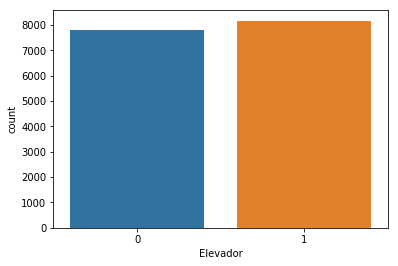

In [99]:
sns.countplot(x='Elevador', data=imoveis)
print(imoveis['Elevador'].value_counts())
print("1 -> Sim")
print("0 -> Não")

<b> Análise: </b>
    - A quantidade de imóvel que tem e não tem elevador não tem grande variação .

----------------------------------------------------------------------

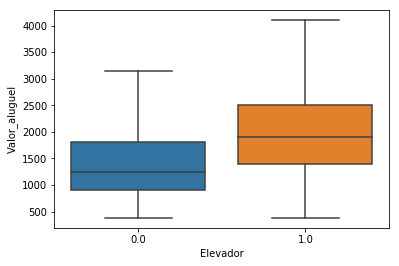

In [20]:
sns.boxplot(x='Elevador', y='Valor_aluguel', data=imoveis, showfliers = False)

<b> Análise: </b>
    - Podemos ver que os imóveis que tem como característica o elevador têm o preço do aluguel um pouco mais caro.

----------------------------------------------------------------------